In [5]:
import numpy as np
import pandas as pd

df_insurance = pd.read_csv("Insurance.csv")

In [6]:
df_insurance

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


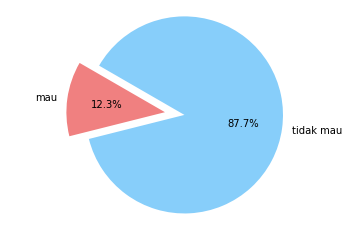

In [7]:

total1 = 0
total0 = 0
for i in df_insurance.iloc[:,-1]: 
  if i==0: total0+=1
  else: total1+=1

import matplotlib.pyplot as plt
labels = 'mau', 'tidak mau'
sizes = [total1, total0]
colors = ['lightcoral', 'lightskyblue']
explode = (0.2, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=150)

plt.axis('equal')
plt.show()

Karena tidak seimbang antara class dependent/Respond 'Mau' dan 'Tidak Mau', maka sebaiknya kita seimbangkan sebelum memasukkan dalam proses training dan testing. <br> 
karena jika tidak, maka bisa saja akan bias dalam prediksinya, akurasinya juga bisa bias karena yang di training dan testing kebanyakan 'tidak mau'.

In [8]:
response1x = []
response1y = [1 for i in range(10000)]

response0x = []
response0y = [0 for i in range(10000)]


for i in range(1, 85000):
  if (df_insurance.Response[i]==0):
    if (len(response0x)<10000):
      response0x.append(df_insurance.iloc[i,[1,2,3,5,6,7,8,9,10]]) # memilih column (id,region_code,response tidak ikut) 
  else:
    if (len(response1x)<10000):
      response1x.append(df_insurance.iloc[i,[1,2,3,5,6,7,8,9,10]]) # memilih column (id,region_code,response tidak ikut)
    else:
      break

r1x = pd.DataFrame(response1x)
r0x = pd.DataFrame(response0x)
X = pd.concat([r1x,r0x])

r1y = pd.DataFrame(response1y)
r0y = pd.DataFrame(response0y)
y = pd.concat([r1y,r0y])

In [9]:
X

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
2,Male,47,1,0,> 2 Years,Yes,38294.0,26.0,27
7,Female,56,1,0,1-2 Year,Yes,32031.0,26.0,72
10,Female,47,1,0,1-2 Year,Yes,47576.0,124.0,46
15,Male,37,1,0,1-2 Year,Yes,2630.0,156.0,147
19,Female,60,1,0,1-2 Year,Yes,32363.0,124.0,102
...,...,...,...,...,...,...,...,...,...
11417,Male,50,1,0,1-2 Year,Yes,35252.0,26.0,54
11418,Male,33,1,1,1-2 Year,Yes,45212.0,122.0,192
11419,Male,48,1,0,1-2 Year,Yes,29725.0,29.0,279
11421,Female,28,1,1,< 1 Year,No,23709.0,152.0,149


Cuplikan Data sebelum di preprocessing

In [10]:
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
9995,0
9996,0
9997,0
9998,0


seperti yang bisa dilihat diatas, class dependent/respond nya masih 1 sebanyak 10000 lalu 0 sebanyak 10000. <br>
akan kita preprocess lalu randomkan selanjutnya

In [11]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X.iloc[:, 0] = labelencoder_X.fit_transform(X.iloc[:, 0]) 
X['Vehicle_Age'] = labelencoder_X.fit_transform(X['Vehicle_Age']) 
X['Vehicle_Damage'] = labelencoder_X.fit_transform(X['Vehicle_Damage'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5))
X[['Age','Annual_Premium','Policy_Sales_Channel','Vintage']] = scaler.fit_transform(X[['Age','Annual_Premium','Policy_Sales_Channel','Vintage']])

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [12]:
X_test.head(10)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
1660,0,1.1875,1,1,1,0,1.123482,4.728395,3.588235
7438,1,2.6875,1,0,0,1,1.326654,4.037037,1.069204
26277,0,3.1875,1,0,0,1,1.421956,4.827160,4.141869
9845,1,2.9375,1,0,0,0,1.160496,4.728395,1.982699
12502,0,1.2500,1,0,1,1,1.000000,4.728395,2.467128
2931,1,1.1250,1,1,1,0,1.139548,4.728395,2.342561
6266,1,2.6875,1,0,0,1,1.000000,4.037037,2.910035
4550,0,1.2500,1,1,1,0,1.195046,4.728395,2.522491
77618,0,3.2500,1,0,0,1,1.419061,4.037037,2.162630
54149,1,2.4375,1,0,0,1,1.181227,1.617284,1.816609


In [13]:
y_test.head(10)

,0
1456,0
6528,0
3253,1
8614,0
1544,1
2568,0
5497,0
3987,0
9598,1
6668,1


Sudah terandom dengan baik

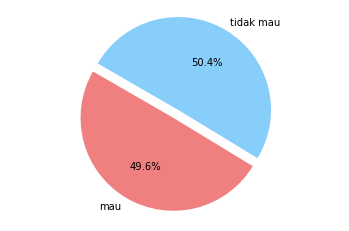

In [14]:
total1=0
total0=0
for i in y_train.iloc[:,0]:
  if (i==1):
    total1+=1
  else:
    total0+=1

labels = 'mau', 'tidak mau'
sizes = [total1, total0]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=150)

plt.axis('equal')
plt.show()

data untuk di training sudah terlihat seimbang meskipun di random split

https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers . <br>
Link referensi untuk hampir semua code dibawah

Maximum accuracy: 0.7993333333333333 at K = 37


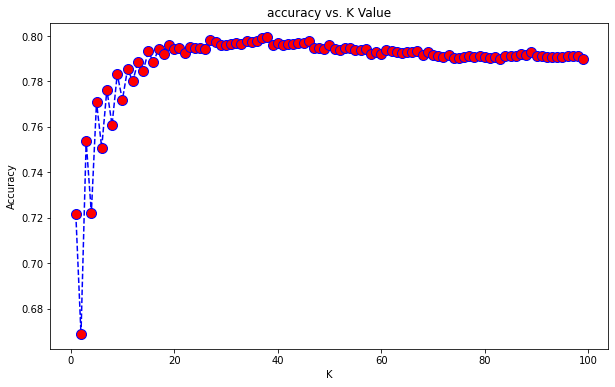

In [15]:
acc = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train.values.ravel()) 
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))

ClassifierAkhir = KNeighborsClassifier(n_neighbors =acc.index(max(acc)) ).fit(X_train,y_train.values.ravel())

In [20]:


Gender = 'Male' 
Age = 18
Driving_License = True 
Previously_Insured = True 
Vehicle_Age = '>2 years' 
Vehicle_Damage = True 
Annual_Premium = 10.0 
Policy_Sales_Channel = 1 
Vintage = 10 


if Gender=="Male": 
  Gender_=1
else:
  Gender_=0

if Driving_License: 
  Driving_License_=1
else:
  Driving_License_=0

if Previously_Insured:
  Previously_Insured_=1
else:
  Previously_Insured_=0

if Vehicle_Age==">2 years": 
  Vehicle_Age_=2
elif Vehicle_Age=="<1 year": 
  Vehicle_Age_=1
else:
  Vehicle_Age_=0

if Vehicle_Damage:
  Vehicle_Damage_=1
else:
  Vehicle_Damage_=0
  

Age_ = (((Age-min(df_insurance['Age'])) / (max(df_insurance['Age'])-min(df_insurance['Age']))) * (5-1)) + 1
Annual_Premium_ = (((Annual_Premium-min(df_insurance['Annual_Premium'])) / (max(df_insurance['Annual_Premium'])-min(df_insurance['Annual_Premium']))) * (5-1)) + 1
Policy_Sales_Channel_ = (((Policy_Sales_Channel-min(df_insurance['Policy_Sales_Channel'])) / (max(df_insurance['Policy_Sales_Channel'])-min(df_insurance['Policy_Sales_Channel']))) * (5-1)) + 1
Vintage_ = (((Vintage-min(df_insurance['Vintage'])) / (max(df_insurance['Vintage'])-min(df_insurance['Vintage']))) * (5-1)) + 1


k = ClassifierAkhir.predict([[Gender_,Age_,Driving_License_,Previously_Insured_,Vehicle_Age_,Vehicle_Damage_,Annual_Premium_,Policy_Sales_Channel_,Vintage_]])
k[0]
if k[0]==0:
  print("Berdasarkan Data yang Anda Masukkan, Model kami memprediksi bahwa customer akan '\033[1mmenolak' tawaran asuransi mobil")
else :
  print("Berdasarkan Data yang Anda Masukkan, Model kami memprediksi bahwa customer akan '\033[1mmenerima' tawaran asuransi mobil")

Berdasarkan Data yang Anda Masukkan, Model kami memprediksi bahwa customer akan 'menerima' tawaran asuransi mobil
